# Capstone Project - Data Science Fundamentals

## Describing the Dataset

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

For this project, I chose to investigate data from the World Health Organization on suicide rates. The data is broken down into columns for Country, Year, Sex, Age, Number of suicides (in people), and Population. The dataset is found at https://www.kaggle.com/szamil/who-suicide-statistics and the file was created using the WHO Mortality Database online tool.

In [394]:
data = pd.read_csv('who_suicide_statistics.csv')
suicide = data.dropna(axis = 0)
suicide_corrected = suicide.replace('5-14 years', '05-14 years')
suicide_corrected.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,05-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


Understanding suicide rates would be very important when considering suicide prevention or in tackling mental health or loneliness. Breaking down this data can help to illuminate which demographics or countries are affected most by suicide and could lend insight into searches for possible reasons or in finding solutions to help reduce suicide rates.

## Analytical Questions

I would first like to understand some of the differences in suicide rates between the countries around the world. In particular, I would be intersted in seeing which country has the highest rate of suicide. I will then look at how the different demographics are affected by suicide. This would answer questions such as: Do men or women commit suicide more often? What age group is affected most by suicide rates? Lastly, I will compare how some countries differ from eachother in relation to it's demographics. This might shed light onto why some countries have higher suicide rates than others. 

### Country Statistics

In [395]:
#Grouping data by year and country.
group = suicide_corrected.groupby(['year','country']).sum() 
#I take the sum to get the total number of suicides among all demographics
group['fraction'] = group['suicides_no']/group['population'] #adding the fractional suicide rate
number_of_countries = len(group.index.levels[1])
group.head()

suicides_no   population  fraction
year country                                      
1979 Argentina       1802.0   24986000.0  0.000072
     Australia       1675.0   13279400.0  0.000126
     Barbados           2.0     229300.0  0.000009
     Belgium         2114.0    9249500.0  0.000229
     Brazil          3459.0  102206100.0  0.000034

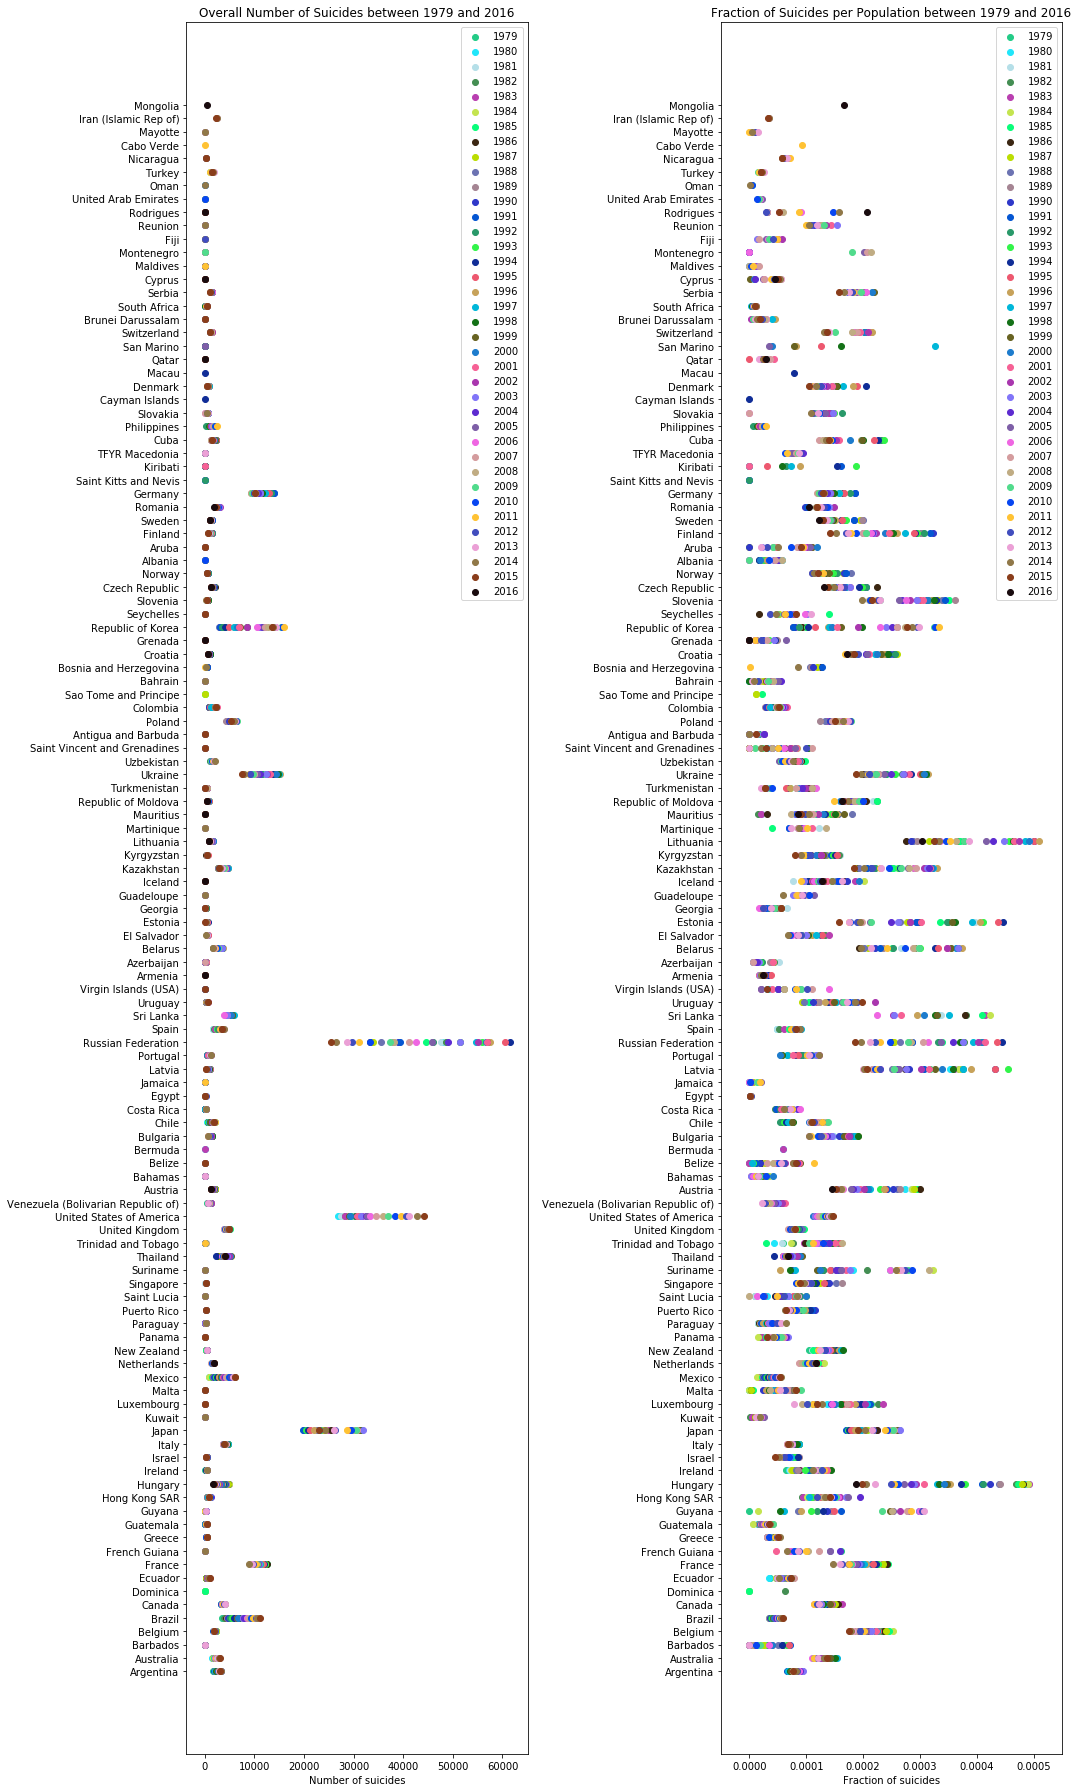

In [409]:
color_values = np.linspace(0,1,38*3)[::-1] #There are 38 years
np.random.shuffle(color_values)
colors = color_values.reshape(38,3)
#I will use these values to describe a color in RGB scale


plt.figure(figsize=(15,25))
plt.subplot(1,2,1)
for i,j in zip(group.index.levels[0], colors):
    vals=group.xs(i)['suicides_no']
    plt.scatter(x = vals.values, y = vals.index, label = i, color=list(j))
    plt.legend()       
plt.title('Overall Number of Suicides between 1979 and 2016')
plt.xlabel('Number of suicides')

plt.subplot(1,2,2)
for i,j in zip(group.index.levels[0], colors):
    percent_vals=group['fraction'].xs(i)
    plt.scatter(x = percent_vals.values, y = percent_vals.index, label = i, color=list(j))
    plt.legend()
plt.xlim(-0.00005,.00055)
plt.title('Fraction of Suicides per Population between 1979 and 2016')
plt.xlabel('Fraction of suicides')

plt.tight_layout()
plt.show()


We now have two plots which represent the number of suicides in each country in my dataset. The first graph (left) represents the total number of suicides per year for each country. You can very clearly see that there are some countries that have a much higher number of suicides than others. This is because they have populations that are very large. If my goal were to reduce the number of suicdes worldwide, then I might want to focus my research on the countries with the highest populations because an overall decrease in these high numbers of suicides might have a greater impact worldwide. 

The second graph (right) represents the fractional number of suicides per population. Understanding the fractional number of suicides will be helpful in relating suicide rates to other countries. Now we can see some clear outliers by country, like Lithuania or Hungary. The coloring of the years helps to identify the year of any specific outliers. We can see that the year 1997 had a particularly high rate of suicide for San Marino and the year 1985 had the lowest rates in Martinique.

We can get even more information by changing these graphs slightly. This next graph (below) represents the fractional number of suicides per population for each country, but now the colors of the years to go from light blue (older) to black (more recent). This allows me to see if there are any obvious trends between the years 1979 and 2016 and still easily compare between the different countries.

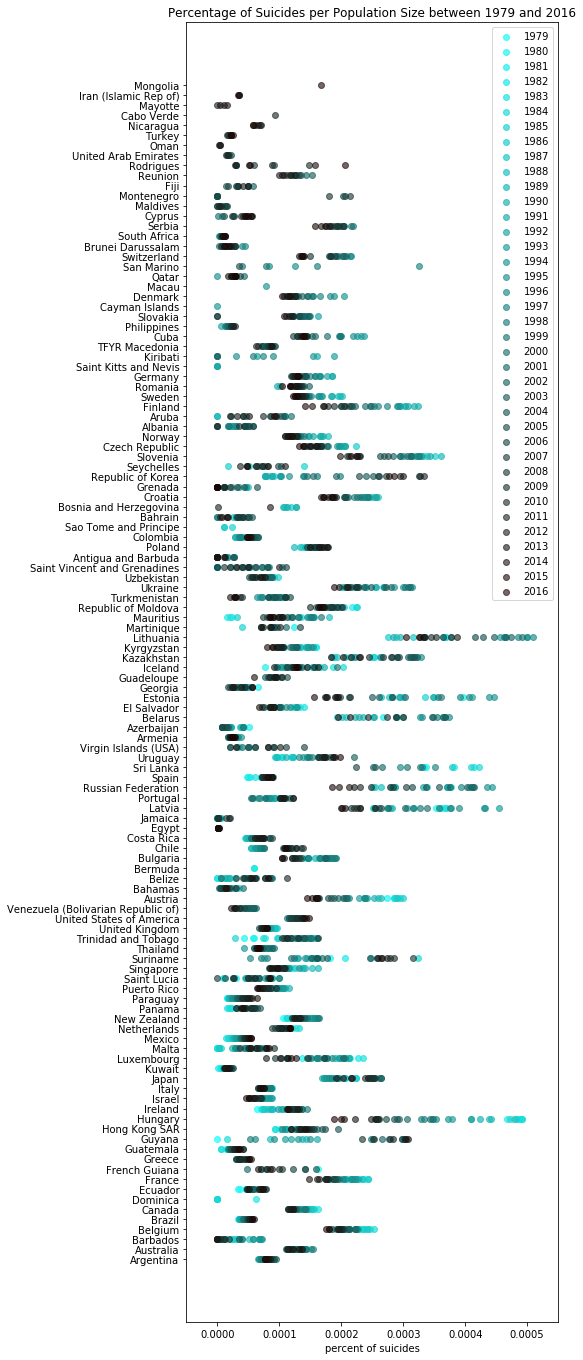

In [408]:
plt.figure(figsize=(8,19))

new_color_values = np.linspace(0,1,38*3)[::-1]
new_colors=new_color_values.reshape(38,3)
new_colors[:,0] = .1
alpha_values = np.linspace(.6,.7,38)[::-1]


for i,j,k in zip(group.index.levels[0], new_colors, alpha_values):
    percent_vals=group['fraction'].xs(i)
    plt.scatter(x = percent_vals.values, y = percent_vals.index, label = i, color=list(j), alpha=k)
    plt.legend()
plt.title('Percentage of Suicides per Population Size between 1979 and 2016')
plt.xlabel('percent of suicides')
plt.xlim(-0.00005,.00055)

plt.tight_layout()
plt.show()


We can identify a few countries that have trends, such as Hungary or Austria, where it seems that the suicide rates have been decreasing over the years. We can see the opposite trend in countries such as Guyana or Uruguay which seem to have increased over time. 

We can see from these graphs that there are countries (such as Lithuania) that have higher rates of suicides than others, but how significant is this difference? What is the mean suicide rate per country? What about worldwide? Lets investigate with some boxplots.

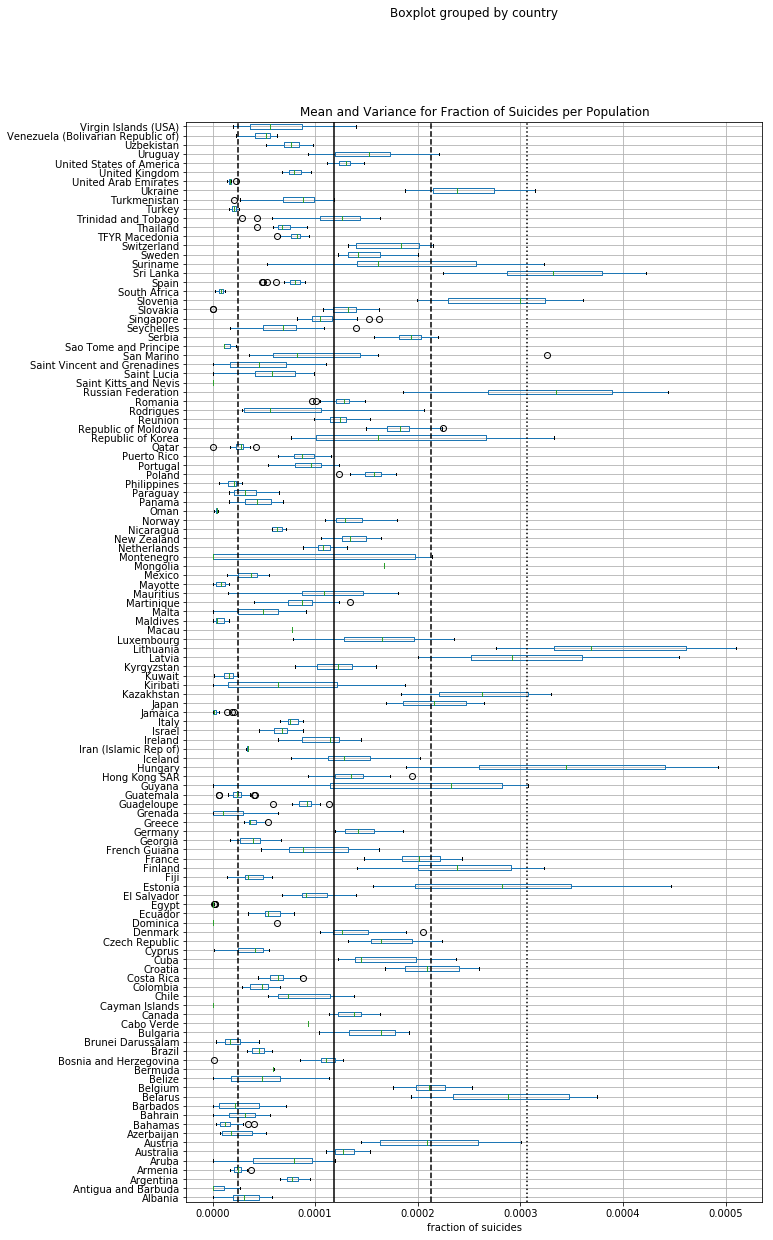

In [410]:
ax = group.boxplot(column=['fraction'], by='country', vert=False, figsize=(10,20))

ax.set_title('Mean and Variance for Fraction of Suicides per Population')
ax.set_xlabel('fraction of suicides')

#adding a vertical line at the mean value
plt.axvline(group['fraction'].mean(), linestyle='solid', color='k')

#adding a vertical line at one standard deviation above the mean.
plt.axvline(group['fraction'].mean() + group['fraction'].std(), linestyle='dashed', color='k')

#adding a vertical line at one standard deviation below the mean.
plt.axvline(group['fraction'].mean() - group['fraction'].std(), linestyle='dashed', color='k') 

#adding a vertical line at two standard deviation above the mean.
plt.axvline(group['fraction'].mean() + group['fraction'].std()*2, linestyle='dotted', color='k')


plt.show()

The worldwide mean value for fractional suicides is 0.00012. In other words, on average, 0.012% of the population commit suicide. I can now see that the mean value and variance for Lithuania is clearly above two standard deviations of the worldwide mean value. This is significantly higher than most of the other countries. There are only 13 other countries that have maximum values above Lithuania's minimum value and only 6 countries with overlapping standard deviations. This tells me that the rate of suicide in Lithuania really is significantly higher than most of the other countries. 

Because I live in the United States of America, I am also interested to see that it lies close to the worldwide mean and has a small variance which means that the suicide rates are mostly remaining the same. 

This plot also allows us to see outliers for some countries. Going back to San Marino, we can again see that there is an outlier which we previously identified as the year 1997.

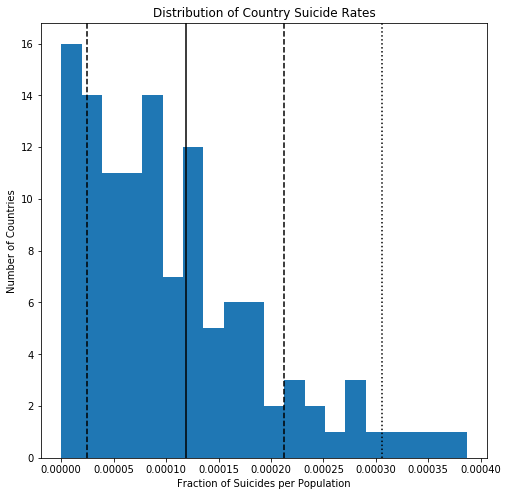

In [411]:
hist = group.groupby(['country']).mean()
plt.figure(figsize=(8,8))
hist['fraction'].plot(kind='hist', bins=20)
plt.title('Distribution of Country Suicide Rates')
plt.ylabel('Number of Countries')
plt.xlabel('Fraction of Suicides per Population')
plt.axvline(group['fraction'].mean(), linestyle='solid', color='k')
plt.axvline(group['fraction'].mean() + group['fraction'].std(), linestyle='dashed', color='k')
plt.axvline(group['fraction'].mean() - group['fraction'].std(), linestyle='dashed', color='k') 
plt.axvline(group['fraction'].mean() + group['fraction'].std()*2, linestyle='dotted', color='k')

plt.show()

This plot is an overall distribution of country suicide rates. We can see from this that the mean is not a great measure of central tendency and that the plot is skewed towards 0. This is as expected; As we get higher in precentage of population to commit suicide, the number of countries would drop (hopefully).

### Demographics

Next, we will explore a few of the other features of the dataset, such as the suicide rates between men and women and the rates between certain age groups. This can help to identify which demographics are most affected by suicide.

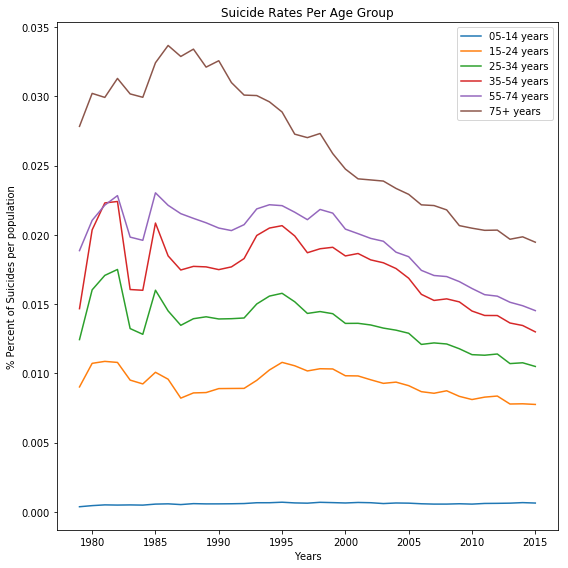

In [412]:
years_ages = suicide_corrected.groupby(['year','age']).sum() 
years_ages['fraction'] = years_ages['suicides_no']/years_ages['population']

years = years_ages.index.levels[0]
ages = years_ages.index.levels[1]
change = years_ages.reset_index()

plt.figure(figsize=(8,8))
for age in ages:
    plt.plot(years[:-1], change[change['age']==age][:-1]['fraction']*100, label=age)
    
plt.title('Suicide Rates Per Age Group')
plt.xlabel('Years')
plt.ylabel('% Percent of Suicides per population')
plt.legend()
plt.tight_layout()
plt.show()

The highest percentage of suicide rates per population is in the age group for 75+. In general, the age groups for 75+ experience more loss and loneliness than other age groups which may attribute to its higher suicide rates. We can also see overall that there is a general decreasing trend over the years.

In [413]:
demographics = suicide_corrected.groupby(['age', 'sex'])['suicides_no', 'population'].mean()
demographics['fraction'] = (demographics['suicides_no']/demographics['population'])*100

sex = demographics.groupby(['sex']).mean()

demographics

suicides_no    population  fraction
age         sex                                        
05-14 years female     6.706156  1.701471e+06  0.000394
            male      14.032612  1.776405e+06  0.000790
15-24 years female    72.648586  1.731345e+06  0.004196
            male     252.043594  1.792066e+06  0.014064
25-34 years female    85.333444  1.684432e+06  0.005066
            male     367.505158  1.703520e+06  0.021573
35-54 years female   202.136439  2.830498e+06  0.007141
            male     758.841930  2.767794e+06  0.027417
55-74 years female   175.826622  1.850439e+06  0.009502
            male     474.805657  1.560599e+06  0.030425
75+ years   female    87.729451  6.418958e+05  0.013667
            male     164.109817  3.594848e+05  0.045651

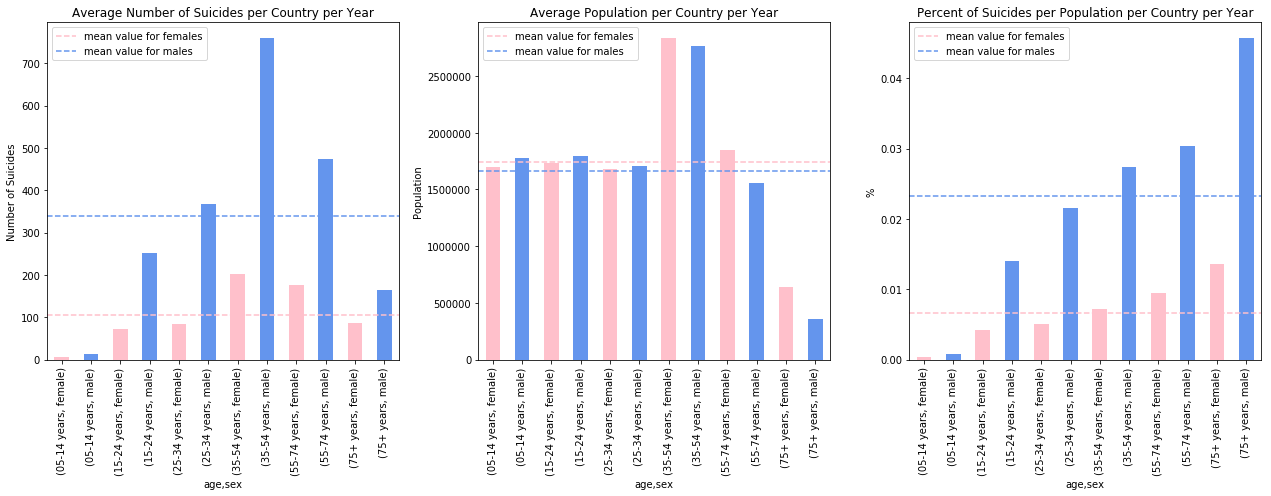

In [415]:
colors = [('pink', 'cornflowerblue')]*3
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,7))
plot = demographics.plot(kind='bar', color=colors, subplots=True, ax=ax, legend=False,
                 title = ('Average Number of Suicides per Country per Year',
                          'Average Population per Country per Year', 
                          'Percent of Suicides per Population per Country per Year'))

ax[0].axhline(sex['suicides_no'][0], linestyle='--', color='pink')
ax[0].axhline(sex['suicides_no'][1], linestyle='--', color='cornflowerblue')
ax[0].legend(['mean value for females', 'mean value for males', '_'])
ax[0].set_ylabel('Number of Suicides')

ax[1].axhline(sex['population'][0], linestyle='--', color='pink', label='mean value for females')
ax[1].axhline(sex['population'][1], linestyle='--', color='cornflowerblue', label='mean value for males')
ax[1].legend(['mean value for females', 'mean value for males', '_'])
ax[1].set_ylabel('Population')

ax[2].axhline(sex['fraction'][0], linestyle='--', color='pink', label='mean value for females')
ax[2].axhline(sex['fraction'][1], linestyle='--', color='cornflowerblue', label='mean value for males')
ax[2].legend(['mean value for females', 'mean value for males', '_'])
ax[2].set_ylabel('%')

plt.tight_layout()
plt.show()

Here I have plotted the total number of suicides, the corresponding population, and the fractional number of suicides per population, seperated into age and gender.

There is a lot of information I can gather from these three graphs. First, it is clear that it is much more common for men to commit suicide than women, both in number of suicides and fractionally per population. The highest total number of suicides worldwide are men between the ages 35-45. The highest number of suicides in women also belong to the same age group. 

Per population, there is an upward trend and the percent of men and women that commit suicide is the highest in the age group 75+ which we saw in the previous plot as well.

I could say that focusing efforts to reach out to the male population, specifically in the age group 75+, in an effort to improve mental health or quality of living (in some way try to reduce these rates) would be a good answer here. But taking into account that the highest population is the age group 35-54, focusing help efforts toward that demographic could help lower overall suicide rates and could be considered a good path to take as well. 

### Comparing Countries

I would like to compare these demographics between a few choice countries and see if they might possibly follow these trends or break them. I am going to compare three countries: Lithuania, United States of America, and Mexico. This way I can compare a country that is well above the mean, close to the mean, and below the mean.

Lithuania had the highest suicide rates, so I would like to see if I can find which demographic might be skewing it away from the mean and vice versa with suicide rates in Mexico.

In [416]:
us = suicide_corrected[suicide_corrected['country'] == 'United States of America']
lithuania = suicide_corrected[suicide_corrected['country'] == 'Lithuania']
mexico = suicide_corrected[suicide_corrected['country'] == 'Mexico']

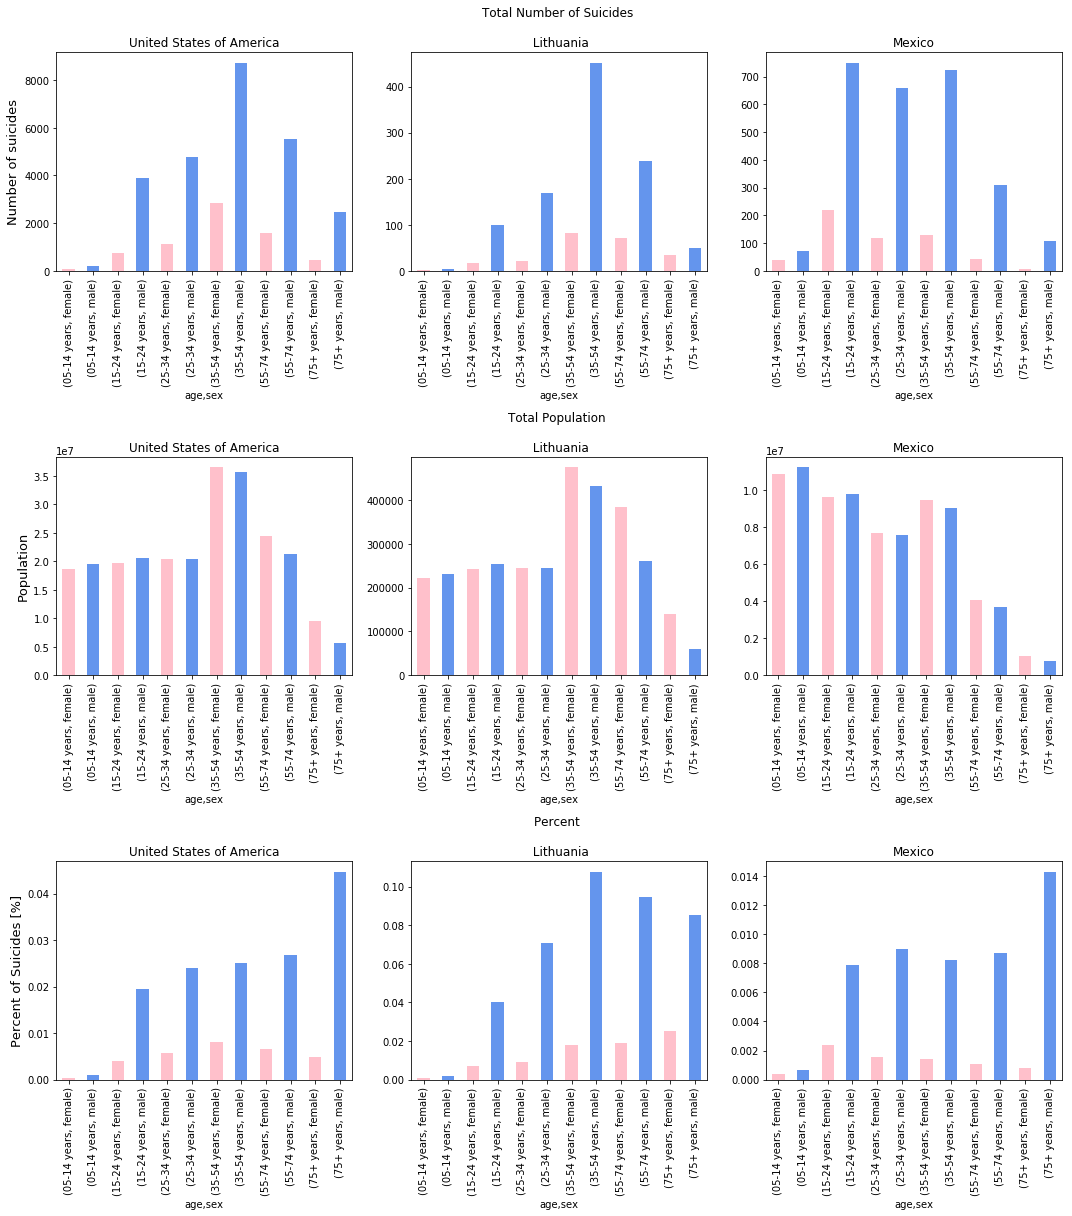

In [417]:
#us data grouped by age and sex
us_age = us.groupby(['age', 'sex'])['suicides_no', 'population'].mean()
us_age['fraction'] = (us_age['suicides_no']/us_age['population'])*103

#lithianian data grouped by age and sex
lithuania_age = lithuania.groupby(['age', 'sex'])['suicides_no', 'population'].mean()
lithuania_age['fraction'] = (lithuania_age['suicides_no']/lithuania_age['population'])*103

#beliz data grouped by age and sex
mexico_age = mexico.groupby(['age', 'sex'])['suicides_no', 'population'].mean()
mexico_age['fraction'] = (mexico_age['suicides_no']/mexico_age['population'])*103

#plotting us data
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,17))

us_age.plot(kind='bar', color=colors, subplots=True, legend=False, ax=ax[:,0],
                 title=('United States of America', 'United States of America', 'United States of America'))

#plotting Lithuania data
lithuania_age.plot(kind='bar', color=colors, subplots=True, legend=False, ax=ax[:,1],
                 title = ('Total Number of Suicides \n \n Lithuania', 
                          'Total Population \n \n Lithuania', 
                          'Percent \n \n Lithuania'))

# plotting Mexico data
mexico_age.plot(kind='bar', color=colors, subplots=True, legend=False, ax=ax[:,2],
                 title = ('Mexico', 'Mexico', 'Mexico'))

ax[0,0].set_ylabel('Number of suicides', fontsize=13)
ax[1,0].set_ylabel('Population', fontsize=13)
ax[2,0].set_ylabel('Percent of Suicides [%]', fontsize=13)

plt.tight_layout()
plt.show()

There are some interesing differences in these graphs. The three plots for the United states look very similar to the overall worldwide plots that we showed above. Since the united states was close to the mean in suicide rates, it would make sense that its demographics are similar to the worldwide mean in demographics as well.

There are some very interesting differences in Lithuania and Mexico.

In Lithuania, the highest total number of suicides are in the male age group 35-54 and it's highest population is in the same group (for men and women) which is similar to the worldwide values, but the biggest difference is that the age group in the percent of suicide per population is now highest in males 35-54. This shows us that the highest percent of suicides are in the largest population group. This is what drags Lithuania out to two standard deviations above the mean worldwide value. 

In Mexico, the total number of suicides are highest in the younger age group of 15-24, but are also close to the age ranges 25-34 and 35-54. Mexico also clearly has a much younger population, where the most populous age group is 05-14 years. The percentage of suicide per demographic in mexico shows that it also has highest suicide rates in the age group of 75+ which is its smallest population and the lowest rates of suicide in Mexico are in it's highest population; the age group 05-14. This would be the reason that Mexico is lower than the worldwide mean.

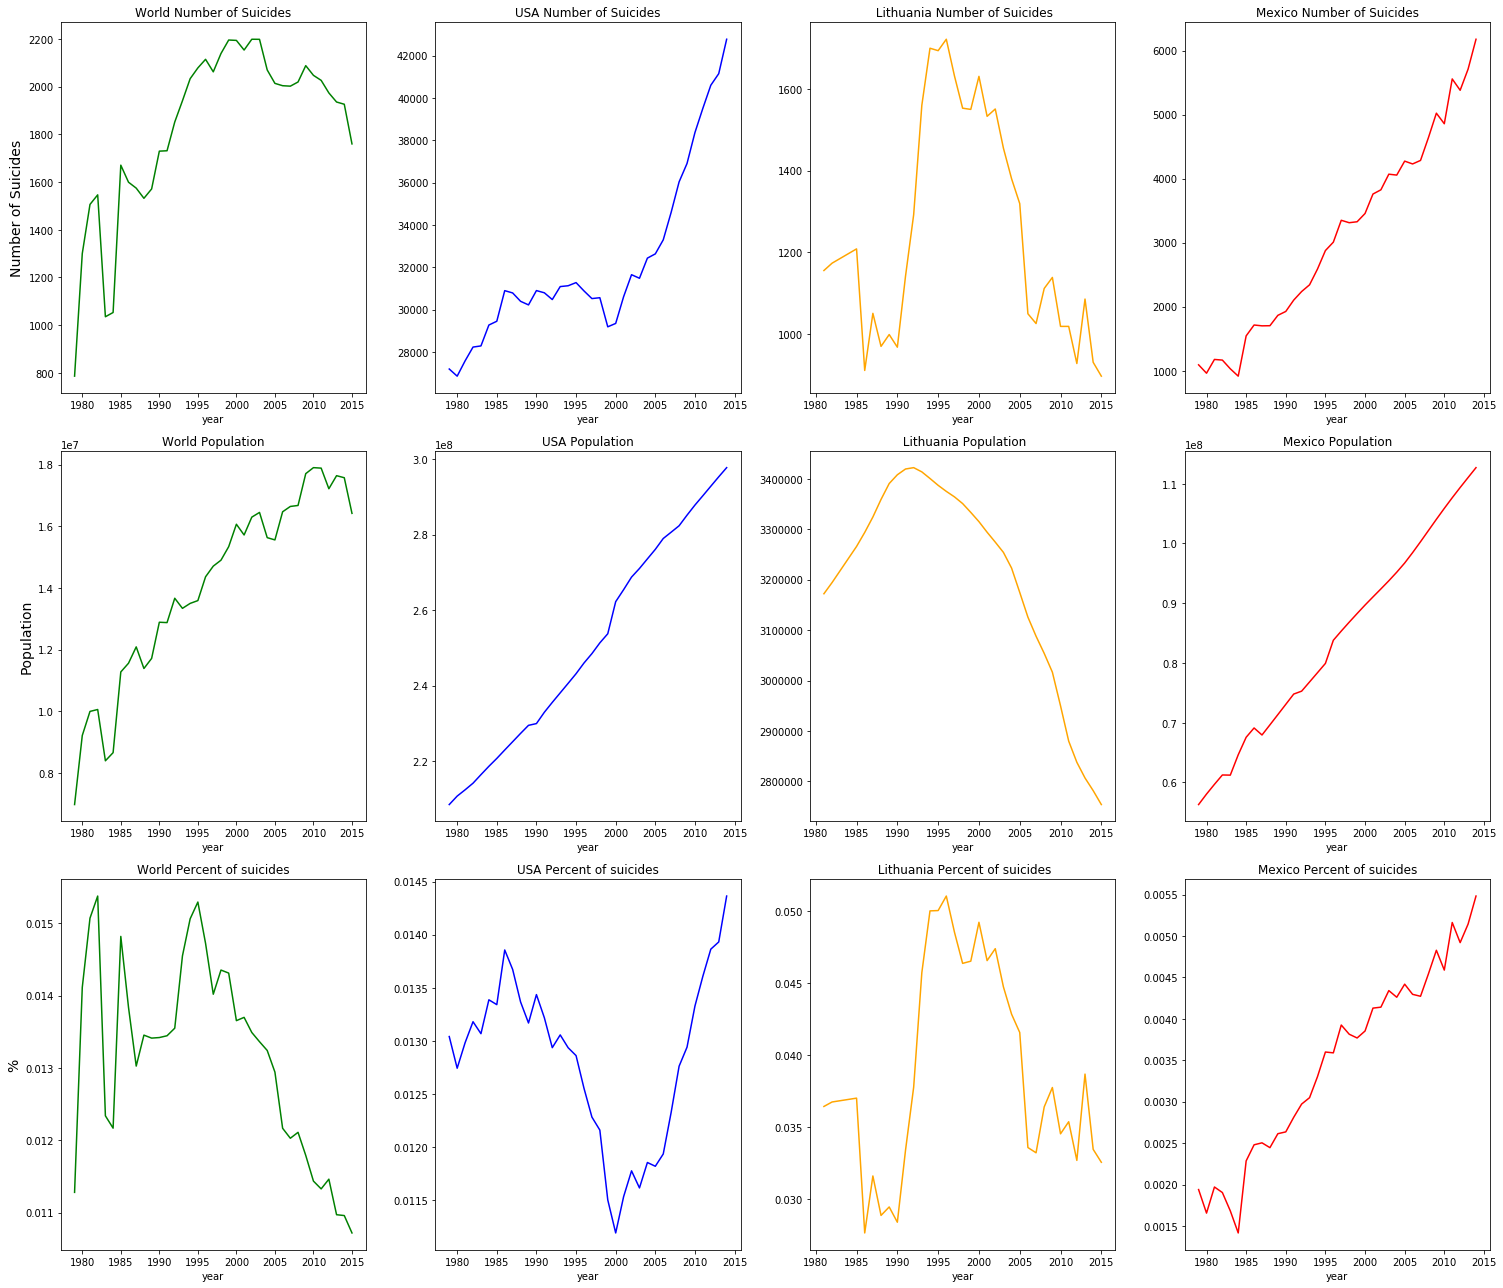

In [432]:
#worldwide data grouped by years
years = suicide_corrected.groupby(['year'])['suicides_no', 'population'].sum()
years = years/number_of_countries
years['percent'] = (years['suicides_no']/years['population'])*100

#us data grouped by years
us_year = us.groupby('year').sum()
us_year['percent'] = (us_year['suicides_no']/us_year['population'])*100

#lithuania data grouped by years
lithuania_year = lithuania.groupby('year').sum()
lithuania_year['percent'] = (lithuania_year['suicides_no']/lithuania_year['population'])*100

mexico_year = mexico.groupby('year').sum()
mexico_year['percent'] = (mexico_year['suicides_no']/mexico_year['population'])*100


fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(21,18))
years[:-1].plot(use_index=True, subplots=True, legend=False, color='g', ax=ax[:,0],
                title=('World Number of Suicides', 'World Population', 'World Percent of suicides'))

us_year[:-1].plot(use_index=True, subplots=True, legend=False, color='b', ax=ax[:,1],
                  title=('USA Number of Suicides', 'USA Population', 'USA Percent of suicides'))

lithuania_year[:-1].plot(use_index=True, subplots=True, legend=False, color='orange', ax=ax[:,2],
                         title=(' Lithuania Number of Suicides', ' Lithuania Population', ' Lithuania Percent of suicides'))

mexico_year[:-1].plot(use_index=True, subplots=True, legend=False, color='r', ax=ax[:,3],
                         title=('Mexico Number of Suicides', 'Mexico Population', 'Mexico Percent of suicides'))

ax[0,0].set_ylabel('Number of Suicides', fontsize=14)
ax[1,0].set_ylabel('Population', fontsize=14)
ax[2,0].set_ylabel('%', fontsize=14)

plt.tight_layout()
plt.show()
#getting rid of data for 2016 because there are only 18 data points and is showing an unrealistic drop in suicide rates.

These graphs compare trends for the different countries over the years 1979-2015. I have removed the year 2016 because there was not enough data for that year and was showing unrealistic drops in suicide rates. 

In total number of suicides is different for each country. Mexico is steadily increasing over time, as is US but has a higher rate of increase since around 2005. Lithuania is the most variable, but the total number of suicides have decreased since the mid 1990's. 

Worldwide, as well as the US and Mexico have steadily increased in population over the years. Lithuania, on the other hand has decreased in population since the 1990's. The year 1990 is when Lithuania gained it's independence from the Soviet Union, and it clearly is having a hard time population-wise since it gained its independence.

The percentage of suicide rates were lowest in the US during the year 2000 and have significantly increased since then, now passing the previous high in the 1980's. Lithuania's suicide rates reached its high in the late 1990's and are now decreasing. Mexico is steadily increasing in suicide rates, but it is worthwhile to note that the percentage values are so low that compared to the other countries it would look like a straight line. So Mexicos suicide rates are very slowly increasing.

## Future Research

There is so much that can be done with this data. Going back to country comparisons, It would be interesting to group countries by geographic location and look for any general trends. I am personally curious as to weather islands have higher or lower suicide rates than countries with close neighbors. Also comparing general climate data to suicide rates for each country would be fascinating as well. Are there any correlations between amount of sunshine per year and suicide rates?

Other research that would be of import is delving deeper into a specific country. Take Lithuania for example. It seems that Lithuania was significantly affected by it's independence in 1990, but taking a deeper look into how its economy and standard of living are fairing would lend significant insight into it's suicide rates. I would like to see what kinds of suicide prevention programs or efforts the country has compared to countries with lower suicide rates. In other words, I would take outside resources and use those to find correlations in suicide rates over time. 

I would also be interesting in delving more into comparisons between increasing or decreasing suicide rates over time. Grouping countries by general increasing and decreasing suicide rates may help to see if there are any similar influencing factors between countries. This would also including outside resources. In relation to the previous mentioned research topic, we could see if there has been an increase in outreach and suicide awareness in certain countries that have decreasing suicide rates. 

The last question that comes to mind is the difference between male and female suicide rates. Taking a deeper look into the male and female psyche and trying to understand why there is such a significant difference between male and female suicide rates would be fascinating. I would also like to look at countries that have less rights for women and see how those countries fare in suicide rates compared with countries that have more rights for women.  